In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Analisis IPM.xlsx")
data.head()

,Provinsi,IPM,persentase penduduk miskin,tpt,persentase pekerja formal
0,Aceh,72.18,15.53,6.30,39.31
1,Sumatera Utara,72.00,8.49,6.33,40.67
2,Sumatera Barat,72.65,6.04,6.52,35.23
3,Riau,72.94,7.00,4.42,45.43
4,Jambi,71.63,7.67,5.09,37.99


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   Y         34 non-null     float64
 2   X1        34 non-null     float64
 3   X2        34 non-null     float64
 4   X3        34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


## STATISTIKA DESKRIPTIF

In [4]:
data.describe()

,IPM,persentase penduduk miskin,tpt,persentase pekerja formal
count,34.000000,34.000000,34.000000,34.000000
mean,71.361176,10.427353,5.492059,39.792353
std,3.937439,5.411687,1.818745,9.633167
min,60.620000,4.560000,3.010000,19.530000
25%,69.730000,6.410000,4.447500,35.652500
50%,71.650000,8.510000,5.060000,39.215000
75%,72.600000,12.637500,6.322500,44.605000
max,81.110000,27.380000,9.910000,64.800000


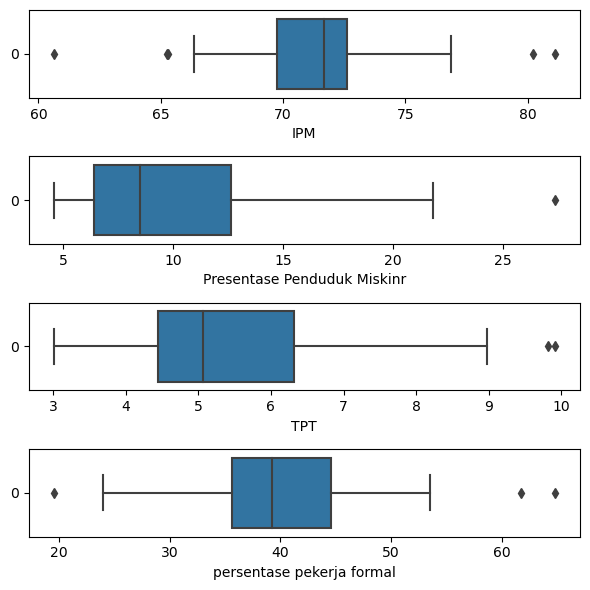

In [5]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(data['IPM'], orient='h', ax = axs[0])
axs[0].set_xlabel('IPM')
plt2 = sns.boxplot(data['persentase penduduk miskin'], orient='h', ax = axs[1])
axs[1].set_xlabel('Presentase Penduduk Miskinr')
plt3 = sns.boxplot(data['tpt'], orient='h', ax = axs[2])
axs[2].set_xlabel('TPT')
plt4 = sns.boxplot(data['persentase pekerja formal'], orient='h', ax = axs[3])
axs[3].set_xlabel('persentase pekerja formal')
plt.tight_layout()

## KORELASI

Masih terdapat data outlier pada masing masing variabel

In [11]:
data.rename(columns={'IPM': 'Y', 'persentase penduduk miskin': 'X1', 'tpt' : 'X2', 'persentase pekerja formal' : 'X3' }, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   Y         34 non-null     float64
 2   X1        34 non-null     float64
 3   X2        34 non-null     float64
 4   X3        34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [16]:
kolom_yang_dihapus = 'Provinsi'
data = data.drop(columns=kolom_yang_dihapus)

C:\Users\Khansa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khansa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khansa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khansa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

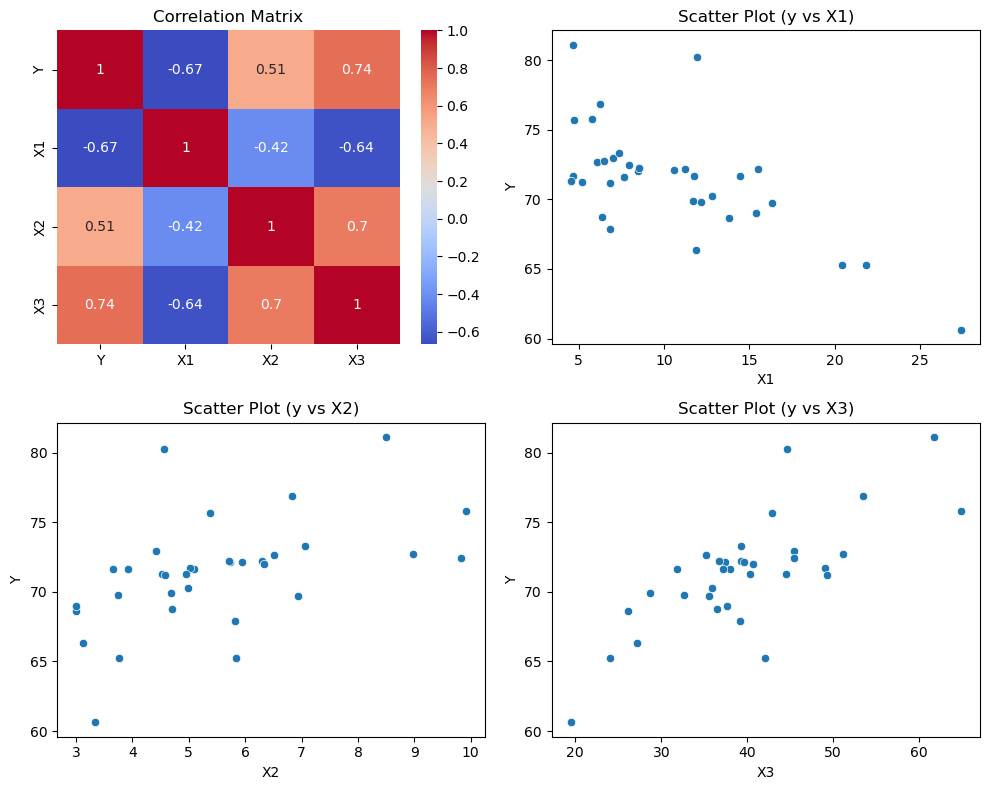

In [34]:
correlation_matrix = data.corr()
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix')

predictors = ['X1', 'X2', 'X3']

for i, predictor in enumerate(predictors, start=1):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=predictor, y='Y', data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot (y vs {predictor})')

plt.tight_layout()
plt.show()

- Y vs X1 (persentase penduduk miskin) = menunjukkan secara visual scatterplot di atas bahwa plot mengikuti garis linier yang mengarah ke bawah, yang artinya IPM dengan persentase penduduk miskin berdasarkan provinsi memiliki hubungan linier negatif karena semakin besar IPM maka semakin persentase penduduk miskin suatu provinsi di Indonesia
- Y vs X2 (TPT) = IPM dengan TPT tahun 2021 berdasarkan provinsi memiliki hubungan linier positif karena semakin besar IPM maka semakin besar TPT suatu provinsi di Indonesia tahun 2021
- Y vs X3 (persentase pekerja formal) = IPM dengan persentase pekerja formal tahun 2021 berdasarkan provinsi memiliki hubungan linier positif karena semakin besar IPM maka semakin besar persenatse pekerja formal suatu provinsi di Indonesia tahun 2021.

- H0 : Tidak terdapat hubungan antara respon dan prediktor
- H1 : Terdapat hubungan antara variabel respon dan prediktor
- Tolak H0 P-Value < alpa

In [36]:
from scipy.stats import pearsonr

In [37]:
correlation1, p_value = pearsonr(data['Y'], data["X1"])
correlation2, p_value = pearsonr(data['Y'], data["X2"])
correlation3, p_value = pearsonr(data['Y'], data["X3"])
n = len(data)
t_statistic1 = (correlation1 * np.sqrt(n - 2)) / np.sqrt(1 - correlation1**2)
t_statistic2 = (correlation2 * np.sqrt(n - 2)) / np.sqrt(1 - correlation2**2)
t_statistic3 = (correlation3 * np.sqrt(n - 2)) / np.sqrt(1 - correlation3**2)
print(f'T-statistik antara y dan X1: {t_statistic1:.4f}, p-value: {p_value:.4f}')
print(f'T-statistik antara y dan X2: {t_statistic2:.4f}, p-value: {p_value:.4f}')
print(f'T-statistik antara y dan X3: {t_statistic3:.4f}, p-value: {p_value:.4f}')

T-statistik antara y dan X1: -5.0511, p-value: 0.0000
T-statistik antara y dan X2: 3.3200, p-value: 0.0000
T-statistik antara y dan X3: 6.2464, p-value: 0.0000


- Y dan X1 = Tolak H0 : Terdapat hubungan antara Y dan X1 diperkuat lagi dengan nilai korelasi sebesar -0,67
- Y dan X2 = Tolak H0 : Terdapat hubungan antara Y dan X2 diperkuat lagi dengan nilai korelasi sebesar 0,51
- Y dan X3 = Tolak H0 : Terdapat hubungan antara Y dan X3 diperkuat lagi dengan nilai korelasi sebesar 0,74

## REGRESI LINEAR BERGANDA

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = data[['X1', 'X2', 'X3']]
y = data['Y']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', round(model.intercept_, 3))
print('Koefisien X1 (Persentase Penduduk Miskin):', round(model.coef_[0], 3))
print('Koefisien X2 (TPT) :', round(model.coef_[1], 3))
print('Koefisien X3 (Persentase Pekerja Formal):', round(model.coef_[2], 3))

Intercept: 65.131
Koefisien X1 (Persentase Penduduk Miskin): -0.235
Koefisien X2 (TPT) : -0.0
Koefisien X3 (Persentase Pekerja Formal): 0.218


- jika nilai persentase penduduk miskin, TPT, dan persentase pekerja formal adalah nol, maka nilai IPM adalah sebesar 65,13. Ketika persentase penduduk miskin bertambah sebesar 1% dengan syarat TPT dan persentase pekerja formal konstan, maka nilai IPM akan berkurang sebesar 0,235. Ketika TPT bertambah sebesar 1 satuan dengan syarat persentase penduduk miskin dan persentase pekerja formal konstan, maka nilai IPM akan berkurang sebesar 0 atau tidak bertambah. Ketika persentase pekerja formal bertambah sebesar 1 satuan dengan syarat persentase penduduk miskin dan TPT konstan, maka nilai IPM akan bertambah sebesar 0 atau tidak bertambah sebesar 0,2182


### UJI SERENTAK with ANOVA ONE WAY

In [40]:
import statsmodels.api as sm
from scipy import stats

- H0 = Persentase penduduk miskin, TPT, dan persentase pekerja formal tidak berpengaruh signifikan terhadap IPM 
- H1 = Persentase penduduk miskin, TPT, dan persentase pekerja formal berpengaruh signifikan terhadap IPM 

In [55]:
# Melakukan ANOVA
f_statistic, p_value = stats.f_oneway(data['X1'], data['X2'], data['X3'])

# Menampilkan hasil
print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)

# Menafsirkan hasil
alpha = 0.05  # tingkat signifikansi
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara setidaknya satu pasang kelompok.")
    print("Persentase penduduk miskin, TPT, dan persentase pekerja formal berpengaruh signifikan terhadap IPM")
else:
    print("Tidak cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.")
    print(" Persentase penduduk miskin, TPT, dan persentase pekerja formal tidak berpengaruh signifikan terhadap IPM")


Nilai F-statistic: 279.71379059174745
Nilai p-value: 1.8526585816968907e-41
Terdapat perbedaan signifikan antara setidaknya satu pasang kelompok.
Persentase penduduk miskin, TPT, dan persentase pekerja formal berpengaruh signifikan terhadap IPM


### UJI PARSIAL with uji-F

In [54]:
import statsmodels.api as sm
import numpy as np

X1 = data['X1']
X2 = data['X2']
X3 = data['X3']
X = sm.add_constant(np.column_stack((X1, X2, X3)))
# Membuat model regresi linear berganda
model = sm.OLS(y, X).fit()

# Melakukan uji F-statistik untuk keseluruhan model
f_statistic = model.fvalue
p_value = model.f_pvalue

# Menampilkan hasil uji F-statistik
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Menampilkan summary model
print(model.summary())


F-statistic: 15.671512498135991
p-value: 2.57397249309789e-06
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     15.67
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.57e-06
Time:                        14:02:42   Log-Likelihood:                -78.307
No. Observations:                  34   AIC:                             164.6
Df Residuals:                      30   BIC:                             170.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

- X1 , Tolak H0 Karena nilai p value < alpa yang berarti persentase penduduk miskin berpengaruh terhadap nilai IPM
- X2 , Gagal Tolak H0 Karena nilai p value > alpa yang berarti TPT tidak berpengaruh terhadap nilai IPM
- X3 , Tolak H0 Karena nilai p value < alpa yang berarti persentase pekerja formal berpengaruh terhadap nilai IPM 


### KEBAIKAN MODEL

In [56]:
print(f"R-squared: {model.rsquared}")

R-squared: 0.6104631544118758


- Proporsi persentase penduduk miskin, TPT, dan persentase pekerja  mampu menjelaskan sebesar 61,04% variabel nilai IPM dan untuk sisanya sebesar 38,96% dijelaskan oleh variabel lain di luar model

### MULTIKOLINEARITAS

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['X1', 'X2', 'X3']]
y = data['Y']

# Menambahkan konstanta ke variabel prediktor
X = sm.add_constant(X)

# Menghitung VIF untuk setiap variabel prediktor
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Variabel        VIF
0    const  55.559727
1       X1   1.712800
2       X2   1.956496
3       X3   2.763313


Terlhiat nilai VIF masih < 10 yang berarti bahwa tidak ada hubungan antara variabel prediktor satu dengan variabel prediktor yang lain, dalam kasus ini yaitu tidak ada hubungan antara data prediktor tingkat pengangguran terbuka, persentase penduduk miskin, dan persentase pekerja formal 

### IIDN

#### Residual Identik

- H0 : Residual yang dihasilkan pada model regresi memenuhi asumsi identik
- H1 : Residual yang dihasilkan pada model regresi tidak memenuhi asumsi identik

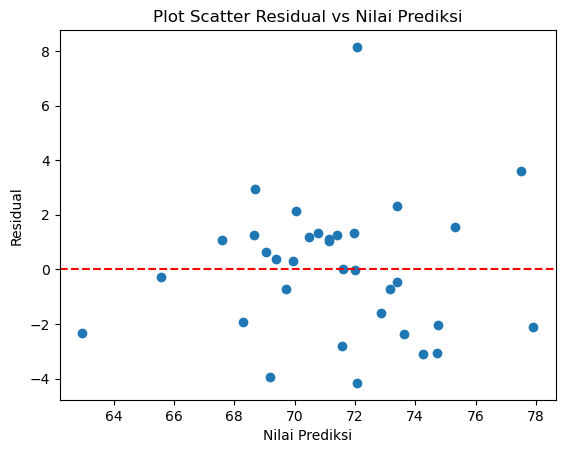

In [59]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Membuat model regresi
# Asumsikan variabel X dan y sudah ditentukan sebelumnya
model = sm.OLS(y, X).fit()

# Menghitung residual dari model
residuals = model.resid

# Membuat plot scatter antara nilai prediksi dan residual
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.title('Plot Scatter Residual vs Nilai Prediksi')
plt.axhline(y=0, color='red', linestyle='--')  # Garis referensi residual nol
plt.show()


menyebar secara acak dan tidak membentuk suatu pola, sehingga dapat disimpulkan bahwa residual data memenuhi asumsi residual identik

In [58]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

# Menentukan variabel independen (X) dan variabel dependen (y)
X = data[['X1', 'X2', 'X3']]
y = data['Y']

# Menambahkan konstanta ke variabel prediktor
X = sm.add_constant(X)

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Menghitung residual dari model
residuals = model.resid

# Melakukan uji Breusch-Pagan test
test_result = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test_result)))


{'LM Statistic': 5.229927027437518, 'LM-Test p-value': 0.15571449372761412, 'F-Statistic': 1.8178358575681086, 'F-Test p-value': 0.16518627514516454}


- Berdasarkan keputusan diatas bahwa nilai dari p value > alpa ( 0,165 > 0,05 ) yang berarti gagal tolak HO yang artinya dapat disimpulkan asumsi residual yang dihasilkan pada model regresi memenuhi asumsi identik. 

#### Residual Independen

- H0 : Residual tidak memiliki korelasi positif atau negatif (independen)
- H1 : Residual memiliki korelasi positif atau negatif (dependen)

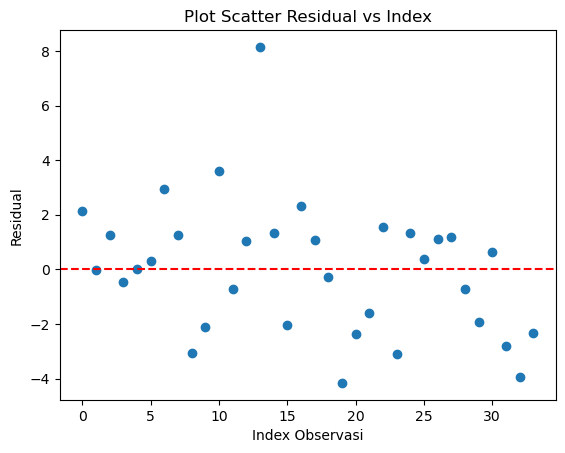

In [61]:
# Menambahkan konstanta ke variabel prediktor
X = sm.add_constant(np.column_stack((X1, X2, X3)))

# Membuat model regresi linear berganda
model = sm.OLS(y, X).fit()

# Menghitung residual dari model
residuals = model.resid

# Membuat plot scatter Residual vs Index
plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Index Observasi')
plt.ylabel('Residual')
plt.title('Plot Scatter Residual vs Index')
plt.axhline(y=0, color='red', linestyle='--')  # Garis referensi residual nol
plt.show()


In [67]:
# Menambahkan konstanta ke variabel prediktor
X = sm.add_constant(np.column_stack((X1, X2, X3)))

# Membuat model regresi linear berganda
model = sm.OLS(y, X).fit()

# Menghitung residual dari model
residuals = model.resid

# Menghitung nilai Durbin-Watson
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)

print(f"Nilai Durbin-Watson: {durbin_watson_stat}")

Nilai Durbin-Watson: 1.9164989087305844


#### Distribusi Normal

- H0 : Residual memenuhi asumsi berdistribusi normal
- H1 : Residual tidak memenuhi asumsi berdistribusi normal

In [74]:
from scipy import stats
import numpy as np

# Melakukan uji Shapiro-Wilk untuk variabel Y
statistic_Y, p_value_Y = stats.shapiro(y)
print(f"Uji Shapiro-Wilk untuk variabel Y - Statistik: {statistic_Y}, P-value: {p_value_Y}")

# Melakukan uji Shapiro-Wilk untuk variabel X1
statistic_X1, p_value_X1 = stats.shapiro(X1)
print(f"Uji Shapiro-Wilk untuk variabel X1 - Statistik: {statistic_X1}, P-value: {p_value_X1}")

# Melakukan uji Shapiro-Wilk untuk variabel X2
statistic_X2, p_value_X2 = stats.shapiro(X2)
print(f"Uji Shapiro-Wilk untuk variabel X2 - Statistik: {statistic_X2}, P-value: {p_value_X2}")

# Melakukan uji Shapiro-Wilk untuk variabel X3
statistic_X3, p_value_X3 = stats.shapiro(X3)
print(f"Uji Shapiro-Wilk untuk variabel X3 - Statistik: {statistic_X3}, P-value: {p_value_X3}")


Uji Shapiro-Wilk untuk variabel Y - Statistik: 0.9743748903274536, P-value: 0.04821312054991722
Uji Shapiro-Wilk untuk variabel X1 - Statistik: 0.9510603547096252, P-value: 0.000974977039732039
Uji Shapiro-Wilk untuk variabel X2 - Statistik: 0.9589545130729675, P-value: 0.0033893724903464317
Uji Shapiro-Wilk untuk variabel X3 - Statistik: 0.9393166303634644, P-value: 0.0001751922827679664


Data tidak memenuhi asumsi distribusi normal